In [1]:
import os
import sys
 
os.environ["SPARK_HOME"] = "/usr/spark2.4.3"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
# In below two lines, use /usr/bin/python2.7 if you want to use Python 2
os.environ["PYSPARK_PYTHON"] = "/usr/local/anaconda/bin/python" 
os.environ["PYSPARK_DRIVER_PYTHON"] = "/usr/local/anaconda/bin/python"
sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.10.7-src.zip")
sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")

from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName("appName")
sc = SparkContext(conf=conf)


In [2]:
# initialise spark context
from pyspark.sql import SQLContext, HiveContext
from pyspark.sql.types import *

# making sqlContext object
sqlContext = SQLContext(sc)


# get python and spark versions and displaying
import platform
print(platform.python_version())
print(sc.version)

# import python sql libraries and other functions 
from pyspark.sql.types import *
from pyspark.sql import Row
from pyspark.sql.functions import *

# import python library for plotting data
import matplotlib.pyplot as plt
import gmplot

#import pandas and numpy
import pandas as pd
#import numpy as np

3.6.8
2.4.3


In [3]:
# create a DataFrame directly from airline delay cause csv file 
# delay_causes = spark.read.option("header", "true").option("delimiter", ",")\
# .option("inferSchema", "true").csv("hdfs:///user/imat5322_819715/Airline_Delay_Cause.csv")

# Read the files and create RDD Ariline
rdd_airline = sc.textFile("hdfs:///user/imat5322_819715/Airline_Delay_Cause_2021.csv").map(lambda l:l.split(','))


In [4]:
# airline delay cause records 
rdd_airline.take(10)

[['year',
  'month',
  'carrier',
  'carrier_name',
  'airport',
  'airport_name',
  'arr_flights',
  'arr_del15',
  'carrier_ct',
  'weather_ct',
  'nas_ct',
  'security_ct',
  'late_aircraft_ct',
  'arr_cancelled',
  'arr_diverted',
  'arr_delay',
  'carrier_delay',
  'weather_delay',
  'nas_delay',
  'security_delay',
  'late_aircraft_delay'],
 ['2021',
  '12',
  '9E',
  'Endeavor Air Inc.',
  'ABE',
  '"Allentown/Bethlehem/Easton',
  ' PA: Lehigh Valley International"',
  '127.00',
  '9.00',
  '2.51',
  '0.00',
  '3.54',
  '0.00',
  '2.95',
  '0.00',
  '0.00',
  '264.00',
  '119.00',
  '0.00',
  '68.00',
  '0.00',
  '77.00'],
 ['2021',
  '12',
  '9E',
  'Endeavor Air Inc.',
  'ABY',
  '"Albany',
  ' GA: Southwest Georgia Regional"',
  '73.00',
  '11.00',
  '5.02',
  '0.00',
  '4.11',
  '0.00',
  '1.87',
  '0.00',
  '0.00',
  '342.00',
  '125.00',
  '0.00',
  '142.00',
  '0.00',
  '75.00'],
 ['2021',
  '12',
  '9E',
  'Endeavor Air Inc.',
  'AEX',
  '"Alexandria',
  ' LA: Alexandria

In [5]:
# total records
rdd_airline.count()

18387

In [6]:
# identifies header and store in new variable
header = rdd_airline.first()
display(header)

['year',
 'month',
 'carrier',
 'carrier_name',
 'airport',
 'airport_name',
 'arr_flights',
 'arr_del15',
 'carrier_ct',
 'weather_ct',
 'nas_ct',
 'security_ct',
 'late_aircraft_ct',
 'arr_cancelled',
 'arr_diverted',
 'arr_delay',
 'carrier_delay',
 'weather_delay',
 'nas_delay',
 'security_delay',
 'late_aircraft_delay']

In [7]:
# filter data without headers 
# new rdd here is filtered with data without the headers
filtered_without_header = rdd_airline.filter(lambda line:line!=header)
filtered_without_header.first()

['2021',
 '12',
 '9E',
 'Endeavor Air Inc.',
 'ABE',
 '"Allentown/Bethlehem/Easton',
 ' PA: Lehigh Valley International"',
 '127.00',
 '9.00',
 '2.51',
 '0.00',
 '3.54',
 '0.00',
 '2.95',
 '0.00',
 '0.00',
 '264.00',
 '119.00',
 '0.00',
 '68.00',
 '0.00',
 '77.00']

In [8]:
# preprocessing the data
# Mapping column names to row entries
column_updates = filtered_without_header.map(lambda x:Row(year=x[0] ,month=x[1], \
                                    carrier=x[2],carrier_name=x[3],airport=x[4],airport_name=x[5],\
                                    arr_flights=x[6],  arr_del15=x[7], carrier_ct=x[8], weather_ct=x[9],\
                                    nas_ct=x[10], security_ct=x[11], late_aircraft_ct=x[12],\
                                    arr_cancelled=x[13], arr_diverted=x[14], arr_delay=x[15],\
                                       carrier_delay=x[16], weather_delay=x[17], nas_delay=x[18],\
                                       security_delay=x[19], late_aircraft_delay=x[20]))
column_updates.take(2)

[Row(airport='ABE', airport_name='"Allentown/Bethlehem/Easton', arr_cancelled='2.95', arr_del15='127.00', arr_delay='0.00', arr_diverted='0.00', arr_flights=' PA: Lehigh Valley International"', carrier='9E', carrier_ct='9.00', carrier_delay='264.00', carrier_name='Endeavor Air Inc.', late_aircraft_ct='0.00', late_aircraft_delay='0.00', month='12', nas_ct='0.00', nas_delay='0.00', security_ct='3.54', security_delay='68.00', weather_ct='2.51', weather_delay='119.00', year='2021'),
 Row(airport='ABY', airport_name='"Albany', arr_cancelled='1.87', arr_del15='73.00', arr_delay='0.00', arr_diverted='0.00', arr_flights=' GA: Southwest Georgia Regional"', carrier='9E', carrier_ct='11.00', carrier_delay='342.00', carrier_name='Endeavor Air Inc.', late_aircraft_ct='0.00', late_aircraft_delay='0.00', month='12', nas_ct='0.00', nas_delay='0.00', security_ct='4.11', security_delay='142.00', weather_ct='5.02', weather_delay='125.00', year='2021')]

In [9]:
# creating dataframe using sqlContext
airline_results = sqlContext.createDataFrame(column_updates)

# checking schema
airline_results.printSchema()

root
 |-- airport: string (nullable = true)
 |-- airport_name: string (nullable = true)
 |-- arr_cancelled: string (nullable = true)
 |-- arr_del15: string (nullable = true)
 |-- arr_delay: string (nullable = true)
 |-- arr_diverted: string (nullable = true)
 |-- arr_flights: string (nullable = true)
 |-- carrier: string (nullable = true)
 |-- carrier_ct: string (nullable = true)
 |-- carrier_delay: string (nullable = true)
 |-- carrier_name: string (nullable = true)
 |-- late_aircraft_ct: string (nullable = true)
 |-- late_aircraft_delay: string (nullable = true)
 |-- month: string (nullable = true)
 |-- nas_ct: string (nullable = true)
 |-- nas_delay: string (nullable = true)
 |-- security_ct: string (nullable = true)
 |-- security_delay: string (nullable = true)
 |-- weather_ct: string (nullable = true)
 |-- weather_delay: string (nullable = true)
 |-- year: string (nullable = true)



In [10]:
# printing the rows to check the records structure
airline_results.show(2)


+-------+--------------------+-------------+---------+---------+------------+--------------------+-------+----------+-------------+-----------------+----------------+-------------------+-----+------+---------+-----------+--------------+----------+-------------+----+
|airport|        airport_name|arr_cancelled|arr_del15|arr_delay|arr_diverted|         arr_flights|carrier|carrier_ct|carrier_delay|     carrier_name|late_aircraft_ct|late_aircraft_delay|month|nas_ct|nas_delay|security_ct|security_delay|weather_ct|weather_delay|year|
+-------+--------------------+-------------+---------+---------+------------+--------------------+-------+----------+-------------+-----------------+----------------+-------------------+-----+------+---------+-----------+--------------+----------+-------------+----+
|    ABE|"Allentown/Bethle...|         2.95|   127.00|     0.00|        0.00| PA: Lehigh Valle...|     9E|      9.00|       264.00|Endeavor Air Inc.|            0.00|               0.00|   12|  0.00|

In [46]:
# Convert datatype from (string to float) for the fields required.
type_changes = airline_results.withColumn("arr_cancelled",airline_results["arr_cancelled"].cast(FloatType()))
type_changes = type_changes.withColumn("arr_del15",type_changes["arr_del15"].cast(FloatType()))
type_changes = type_changes.withColumn("arr_delay",type_changes["arr_delay"].cast(FloatType()))
type_changes = type_changes.withColumn("arr_diverted",type_changes["arr_diverted"].cast(FloatType()))
type_changes = type_changes.withColumn("carrier_ct",type_changes["carrier_ct"].cast(FloatType()))
type_changes = type_changes.withColumn("carrier_delay",type_changes["carrier_delay"].cast(FloatType()))
type_changes = type_changes.withColumn("late_aircraft_ct",type_changes["late_aircraft_ct"].cast(FloatType()))
type_changes = type_changes.withColumn("late_aircraft_delay",type_changes["late_aircraft_delay"].cast(FloatType()))
type_changes = type_changes.withColumn("nas_ct",type_changes["nas_ct"].cast(FloatType()))
type_changes = type_changes.withColumn("nas_delay",type_changes["nas_delay"].cast(FloatType()))
type_changes = type_changes.withColumn("security_ct",type_changes["security_ct"].cast(FloatType()))
type_changes = type_changes.withColumn("security_delay",type_changes["security_delay"].cast(FloatType()))
type_changes = type_changes.withColumn("weather_ct",type_changes["weather_ct"].cast(FloatType()))
type_changes = type_changes.withColumn("weather_delay",type_changes["weather_delay"].cast(FloatType()))
type_changes = type_changes.withColumn("arr_flights",type_changes["arr_flights"].cast(IntegerType()))

# Convert datatype from (string to int) for the fields required.
type_changes = type_changes.withColumn("month",type_changes["month"].cast(IntegerType()))
airline_data = type_changes.withColumn("year",type_changes["year"].cast(IntegerType()))

# printing the new schema
airline_data.printSchema()


root
 |-- airport: string (nullable = true)
 |-- airport_name: string (nullable = true)
 |-- arr_cancelled: float (nullable = true)
 |-- arr_del15: float (nullable = true)
 |-- arr_delay: float (nullable = true)
 |-- arr_diverted: float (nullable = true)
 |-- arr_flights: integer (nullable = true)
 |-- carrier: string (nullable = true)
 |-- carrier_ct: float (nullable = true)
 |-- carrier_delay: float (nullable = true)
 |-- carrier_name: string (nullable = true)
 |-- late_aircraft_ct: float (nullable = true)
 |-- late_aircraft_delay: float (nullable = true)
 |-- month: integer (nullable = true)
 |-- nas_ct: float (nullable = true)
 |-- nas_delay: float (nullable = true)
 |-- security_ct: float (nullable = true)
 |-- security_delay: float (nullable = true)
 |-- weather_ct: float (nullable = true)
 |-- weather_delay: float (nullable = true)
 |-- year: integer (nullable = true)



In [48]:
# Total airline records
airline_data.count()

18386

In [49]:
# here we are droping the columns, as these are not useful.
airline_data = airline_data.drop("carrier_ct", "late_aircraft_ct","nas_ct","security_ct","weather_ct") 

# printing the updated schema
airline_data.printSchema()


root
 |-- airport: string (nullable = true)
 |-- airport_name: string (nullable = true)
 |-- arr_cancelled: float (nullable = true)
 |-- arr_del15: float (nullable = true)
 |-- arr_delay: float (nullable = true)
 |-- arr_diverted: float (nullable = true)
 |-- arr_flights: integer (nullable = true)
 |-- carrier: string (nullable = true)
 |-- carrier_delay: float (nullable = true)
 |-- carrier_name: string (nullable = true)
 |-- late_aircraft_delay: float (nullable = true)
 |-- month: integer (nullable = true)
 |-- nas_delay: float (nullable = true)
 |-- security_delay: float (nullable = true)
 |-- weather_delay: float (nullable = true)
 |-- year: integer (nullable = true)



In [52]:
# Register the DataFrame as a table
sqlContext.registerDataFrameAsTable(airline_data, "airline_table")

In [53]:
# checking if the data loads for sql query
sqlContext.sql("select * from airline_table").take(5)
pdpyr= airline_data.toPandas()
pdpyr

,airport,airport_name,arr_cancelled,arr_del15,arr_delay,arr_diverted,arr_flights,carrier,carrier_delay,carrier_name,late_aircraft_delay,month,nas_delay,security_delay,weather_delay,year
0,ABE,"""Allentown/Bethlehem/Easton",2.95,127.0,0.0,0.0,None,9E,264.0,Endeavor Air Inc.,0.0,12,0.0,68.0,119.0,2021
1,ABY,"""Albany",1.87,73.0,0.0,0.0,None,9E,342.0,Endeavor Air Inc.,0.0,12,0.0,142.0,125.0,2021
2,AEX,"""Alexandria",1.15,62.0,0.0,0.0,None,9E,439.0,Endeavor Air Inc.,0.0,12,0.0,103.0,156.0,2021
3,AGS,"""Augusta",2.74,166.0,1.0,0.0,None,9E,1266.0,Endeavor Air Inc.,0.0,12,693.0,167.0,291.0,2021
4,ALB,"""Albany",0.82,52.0,0.0,0.0,None,9E,497.0,Endeavor Air Inc.,0.0,12,180.0,21.0,278.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18381,TLH,"""Tallahassee",2.01,56.0,0.0,0.0,None,YX,179.0,Republic Airline,0.0,2,0.0,19.0,70.0,2021
18382,TPA,"""Tampa",6.70,252.0,0.0,3.0,None,YX,2272.0,Republic Airline,0.0,2,218.0,1174.0,271.0,2021
18383,TUL,"""Tulsa",0.85,9.0,0.0,0.0,None,YX,211.0,Republic Airline,0.0,2,0.0,121.0,21.0,2021
18384,TUS,"""Tucson",0.00,10.0,0.0,0.0,None,YX,0.0,Republic Airline,0.0,2,0.0,0.0,0.0,2021


In [16]:
# Total types of unique carriers
sqlContext.sql("select distinct carrier_name from airline_table").count()

17

In [17]:
# Total unique airports 
sqlContext.sql("select distinct airport from airline_table").count()

371

In [18]:
# Total operation performed by certain carrier, presented in descending order
sqlContext.sql("select carrier, count(carrier) as carrier_op from airline_table group by carrier order by \
carrier_op desc \
").show()

+-------+----------+
|carrier|carrier_op|
+-------+----------+
|     OO|      2531|
|     MQ|      1555|
|     G4|      1382|
|     DL|      1313|
|     9E|      1232|
|     AA|      1134|
|     WN|      1132|
|     F9|      1093|
|     YV|      1082|
|     UA|      1076|
|     OH|      1023|
|     YX|       989|
|     AS|       829|
|     B6|       673|
|     NK|       569|
|     QX|       542|
|     HA|       231|
+-------+----------+



In [19]:
# Total flight operations
sqlContext.sql("select * from airline_table").count()

18386

In [20]:
# Average carrier delay
sqlContext.sql("select carrier, avg(carrier_delay) as delays from airline_table \
where carrier_delay > 0.0 group by carrier order by delays desc").show(20)

+-------+------------------+
|carrier|            delays|
+-------+------------------+
|     WN|10295.718197879858|
|     AA| 8072.110412926391|
|     B6| 5588.079510703364|
|     UA|  4684.64320625611|
|     NK|  4349.02495543672|
|     DL| 4205.476190476191|
|     OO| 3849.486475409836|
|     YX| 3315.818994413408|
|     YV|  2563.53227408143|
|     OH| 2084.424120603015|
|     F9|          2007.349|
|     AS|1845.4074074074074|
|     G4|1630.4778694673669|
|     MQ|1578.0712328767124|
|     9E|1289.0008561643835|
|     QX|           1262.76|
|     HA|1071.6387665198238|
+-------+------------------+



In [21]:
# Average weather delay with respect to airport
sqlContext.sql("select airport, avg(weather_delay) as delays from airline_table \
where weather_delay > 0.0 group by airport order by delays desc").show(20)

+-------+------------------+
|airport|            delays|
+-------+------------------+
|    DEN|12307.373831775702|
|    DFW|10333.976377952757|
|    ORD| 8042.297101449275|
|    ATL| 6982.986754966887|
|    LAX|       6821.859375|
|    SFB| 6290.636363636364|
|    MCO| 6096.990196078431|
|    JFK| 5896.435294117647|
|    ASE| 5869.272727272727|
|    CLT| 5713.454545454545|
|    SLC|  5228.30701754386|
|    PHX| 5081.612676056338|
|    MIA|           4867.85|
|    MDW| 4635.574468085107|
|    DAL| 4615.717391304348|
|    IAH| 4558.124031007752|
|    FLL| 4432.728260869565|
|    SEA| 4389.396694214876|
|    SFO| 4255.327272727272|
|    DTW|4080.1006711409395|
+-------+------------------+
only showing top 20 rows



In [22]:
# Number of arr_delays on airports in descending order
sqlContext.sql("select airport, count(arr_delay) as delays from airline_table \
where arr_delay > 0.0 group by airport order by delays desc").show(20)

+-------+------+
|airport|delays|
+-------+------+
|    DFW|    93|
|    ORD|    86|
|    LGA|    85|
|    LAX|    77|
|    DCA|    71|
|    MCO|    69|
|    SEA|    67|
|    LAS|    66|
|    DEN|    66|
|    ATL|    65|
|    IAH|    65|
|    AUS|    65|
|    EWR|    62|
|    PHX|    60|
|    FLL|    57|
|    MIA|    57|
|    MSY|    55|
|    RSW|    54|
|    DTW|    53|
|    CLT|    51|
+-------+------+
only showing top 20 rows



In [23]:
# Delays count by carrier in descending order
sqlContext.sql("select carrier_name, count(carrier_delay) as delays from airline_table \
where carrier_delay > 0.0  group by carrier_name order by delays desc").show()

+--------------------+------+
|        carrier_name|delays|
+--------------------+------+
|SkyWest Airlines ...|  2440|
|           Envoy Air|  1460|
|       Allegiant Air|  1333|
|Delta Air Lines Inc.|  1281|
|   Endeavor Air Inc.|  1168|
|Southwest Airline...|  1132|
|American Airlines...|  1114|
|United Air Lines ...|  1023|
|  Mesa Airlines Inc.|  1007|
|Frontier Airlines...|  1000|
|   PSA Airlines Inc.|   995|
|    Republic Airline|   895|
|Alaska Airlines Inc.|   810|
|     JetBlue Airways|   654|
|    Spirit Air Lines|   561|
|         Horizon Air|   525|
|Hawaiian Airlines...|   227|
+--------------------+------+



In [24]:
# Average security delay with respect to airports
sqlContext.sql("select airport, avg(security_delay) as delays from airline_table \
where security_delay > 0.0 group by airport order by delays desc").show(20)

+-------+------------------+
|airport|            delays|
+-------+------------------+
|    DEN| 6859.934579439252|
|    DFW| 6423.850393700787|
|    ORD| 5018.810218978102|
|    DAL| 4947.260869565217|
|    MCO|          4164.375|
|    EWR|3684.2678571428573|
|    FLL|3210.9887640449438|
|    SFB| 2984.909090909091|
|    JFK|2730.2368421052633|
|    LAS|2601.9327731092435|
|    IAH|       2572.703125|
|    ATL| 2502.909090909091|
|    PIE| 2473.181818181818|
|    SEA|2371.5363636363636|
|    PGD| 2287.181818181818|
|    MIA|2193.0315789473684|
|    CLT|  2104.85593220339|
|    LAX|            1985.7|
|    HOU|1938.6888888888889|
|    MDW|1840.1914893617022|
+-------+------------------+
only showing top 20 rows



In [25]:
# Average nas delay with respect to airports
sqlContext.sql("select airport, avg(nas_delay) as delays from airline_table \
where nas_delay > 0.0 group by airport order by delays desc").show(20)

+-------+------------------+
|airport|            delays|
+-------+------------------+
|    DIK|            3116.0|
|    DFW|3066.8396226415093|
|    DEN|1991.1935483870968|
|    SLC|1784.6052631578948|
|    ASE|            1764.3|
|    JMS|            1763.5|
|    DVL|1727.6666666666667|
|    ORD| 1714.061403508772|
|    IAH|1550.3333333333333|
|    MSP|1423.6605504587155|
|    XWA| 1386.888888888889|
|    INL|           1241.25|
|    CLT| 1158.159574468085|
|    DTW| 1128.989898989899|
|    LAX|1097.1359223300972|
|    JFK|1001.4137931034483|
|    ATL| 993.4916666666667|
|    PIE| 974.4545454545455|
|    VLD|             974.0|
|    SEA| 958.4204545454545|
+-------+------------------+
only showing top 20 rows



In [26]:
# Number of times late_aircraft_delay with respect to airports
sqlContext.sql("select airport, count(late_aircraft_delay) as delays from airline_table \
where late_aircraft_delay > 0.0 group by airport order by delays desc").show(20)

+-------+------+
|airport|delays|
+-------+------+
|    LAX|    74|
|    ORD|    69|
|    LAS|    59|
|    ATL|    58|
|    FLL|    58|
|    DFW|    58|
|    PHL|    53|
|    DEN|    51|
|    PHX|    51|
|    MCO|    50|
|    DTW|    50|
|    SEA|    49|
|    LGA|    46|
|    DCA|    45|
|    BOS|    45|
|    MSP|    45|
|    JFK|    43|
|    MIA|    42|
|    CLT|    42|
|    TPA|    42|
+-------+------+
only showing top 20 rows



In [27]:
# Number of times late_aircraft_delay with respect to carrier
sqlContext.sql("select carrier, count(late_aircraft_delay) as delays from airline_table \
where late_aircraft_delay > 0.0 group by carrier order by delays desc").show(20)

+-------+------+
|carrier|delays|
+-------+------+
|     WN|   433|
|     AA|   430|
|     NK|   313|
|     B6|   256|
|     DL|   227|
|     G4|   208|
|     OH|   190|
|     OO|   164|
|     YX|   146|
|     MQ|   101|
|     AS|    92|
|     YV|    77|
|     HA|    44|
|     QX|    42|
|     9E|    39|
|     UA|    38|
+-------+------+



In [28]:
# Flight diverted for certain carrier
sqlContext.sql("select carrier, count(arr_diverted) as total_diverted from airline_table \
where arr_diverted > 0.0 group by carrier order by total_diverted desc").show()

+-------+--------------+
|carrier|total_diverted|
+-------+--------------+
|     OO|          1405|
|     WN|           932|
|     AA|           873|
|     MQ|           784|
|     G4|           725|
|     YV|           612|
|     UA|           531|
|     YX|           522|
|     F9|           436|
|     OH|           418|
|     AS|           415|
|     NK|           385|
|     B6|           379|
|     QX|           317|
|     DL|           313|
|     9E|           192|
|     HA|            42|
+-------+--------------+



In [29]:
# Flight diverted for certain airports
sqlContext.sql("select airport_name, count(arr_diverted) as total_diverted from airline_table \
where arr_diverted > 0.0 group by airport_name order by total_diverted desc").show()

+------------------+--------------+
|      airport_name|total_diverted|
+------------------+--------------+
|       "Washington|           169|
|         "New York|           154|
|          "Chicago|           139|
|          "Houston|           121|
|         "Portland|           117|
|          "Phoenix|           110|
|          "Atlanta|           110|
|        "Nashville|           105|
|           "Austin|           104|
|      "Los Angeles|           104|
|"Dallas/Fort Worth|            98|
|          "Detroit|            96|
|        "Las Vegas|            95|
|           "Denver|            93|
|      "Minneapolis|            91|
|      "New Orleans|            90|
|           "Newark|            90|
|     "Philadelphia|            89|
|           "Boston|            88|
|   "Raleigh/Durham|            88|
+------------------+--------------+
only showing top 20 rows



In [30]:
# Flights cancelled from the airports
sqlContext.sql("select airport, count(arr_cancelled) as total_cancel from airline_table \
where arr_cancelled  > 0.0 \
group by airport order by total_cancel desc").show()

+-------+------------+
|airport|total_cancel|
+-------+------------+
|    BNA|         151|
|    ATL|         144|
|    PIT|         137|
|    CLE|         137|
|    DTW|         137|
|    AUS|         137|
|    RDU|         134|
|    MCI|         133|
|    MSP|         132|
|    ORD|         132|
|    PHX|         132|
|    CVG|         131|
|    CHS|         131|
|    IND|         131|
|    MSY|         128|
|    LAS|         127|
|    LAX|         126|
|    STL|         124|
|    IAH|         123|
|    SAN|         119|
+-------+------------+
only showing top 20 rows



In [31]:
# Flights cancelled from the airports due to security
sqlContext.sql("select airport, count(security_delay) as sec_delay from airline_table \
where security_delay  > 0.0 \
group by airport order by sec_delay desc").show()

+-------+---------+
|airport|sec_delay|
+-------+---------+
|    BNA|      153|
|    MSP|      145|
|    DTW|      144|
|    ATL|      143|
|    PIT|      142|
|    AUS|      141|
|    RDU|      141|
|    CLE|      140|
|    IND|      138|
|    ORD|      137|
|    MSY|      137|
|    PHX|      133|
|    MCI|      133|
|    CHS|      133|
|    PHL|      130|
|    IAH|      128|
|    DFW|      127|
|    DCA|      124|
|    STL|      123|
|    CVG|      123|
+-------+---------+
only showing top 20 rows



In [32]:
# Flights average delay from the carriers
sqlContext.sql("select distinct airport, carrier from airline_table").show()

+-------+-------+
|airport|carrier|
+-------+-------+
|    MDT|     9E|
|    KTN|     AS|
|    ABE|     MQ|
|    PBI|     UA|
|    BUR|     WN|
|    LAX|     AA|
|    LAX|     AS|
|    ANC|     DL|
|    SYR|     F9|
|    BDL|     MQ|
|    ANC|     F9|
|    HDN|     DL|
|    ABE|     G4|
|    MDT|     G4|
|    EWR|     NK|
|    PNS|     OH|
|    BFL|     OO|
|    RST|     OO|
|    ECP|     YV|
|    SEA|     AA|
+-------+-------+
only showing top 20 rows



In [33]:
# flight delays on basis of carriers
sqlContext.sql("select carrier, \
count(arr_cancelled), \
avg(arr_delay), \
sum(arr_diverted),\
count(arr_flights),\
avg(carrier_delay), \
avg(late_aircraft_delay),\
avg(nas_delay),\
avg(security_delay),\
avg(weather_delay)\
               from airline_table \
group by carrier").show()

+-------+--------------------+-------------------+-----------------+------------------+------------------+------------------------+------------------+-------------------+------------------+
|carrier|count(arr_cancelled)|     avg(arr_delay)|sum(arr_diverted)|count(arr_flights)|avg(carrier_delay)|avg(late_aircraft_delay)|    avg(nas_delay)|avg(security_delay)|avg(weather_delay)|
+-------+--------------------+-------------------+-----------------+------------------+------------------+------------------------+------------------+-------------------+------------------+
|     UA|                1075| 0.9674418604651163|           5945.0|                 0| 4458.037209302325|      1.7953488372093023|332.66418604651165| 1020.5051162790697|1415.9395348837209|
|     NK|                 569|   0.70298769771529|           5562.0|                 0| 4287.878734622144|       66.56942003514939| 225.8541300527241| 1442.1423550087873|1225.6449912126538|
|     AA|                1133| 1.7899382171226832|

In [34]:
# flight delays on basis of airports
sqlContext.sql("select airport, \
count(carrier) as t_carrier,\
count(arr_cancelled), \
avg(arr_delay), \
count(arr_diverted),\
count(arr_flights),\
avg(carrier_delay), \
avg(late_aircraft_delay),\
avg(nas_delay),\
avg(security_delay),\
avg(weather_delay)\
               from airline_table \
group by airport").show(1)

+-------+---------+--------------------+-------------------+-------------------+------------------+------------------+------------------------+------------------+-------------------+------------------+
|airport|t_carrier|count(arr_cancelled)|     avg(arr_delay)|count(arr_diverted)|count(arr_flights)|avg(carrier_delay)|avg(late_aircraft_delay)|    avg(nas_delay)|avg(security_delay)|avg(weather_delay)|
+-------+---------+--------------------+-------------------+-------------------+------------------+------------------+------------------------+------------------+-------------------+------------------+
|    BGM|       11|                  11|0.36363636363636365|                 11|                 0|113.27272727272727|                     0.0|2.1818181818181817| 12.454545454545455| 60.54545454545455|
+-------+---------+--------------------+-------------------+-------------------+------------------+------------------+------------------------+------------------+-------------------+----------

In [35]:
import pixiedust


Pixiedust database opened successfully



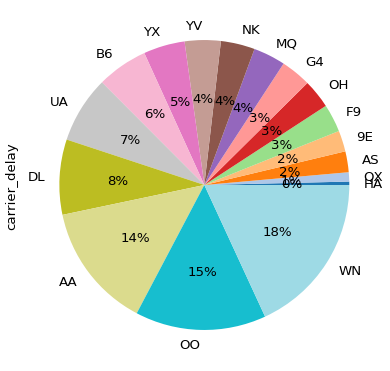

In [36]:
display(airline_data)
#Avg Percentage of each carrier delay


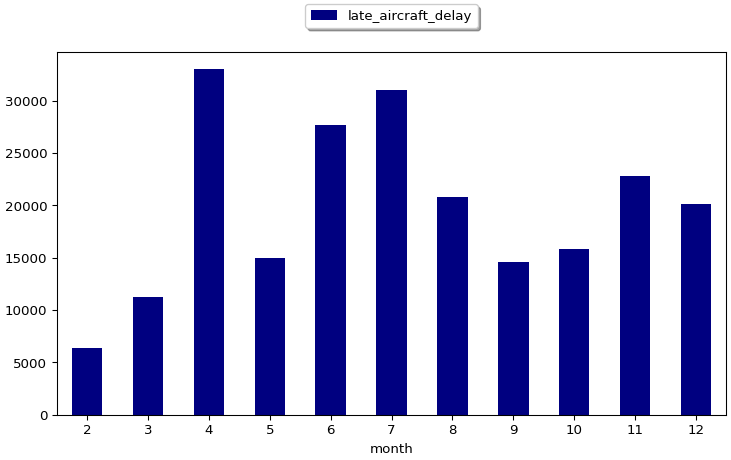

In [37]:
#In each month late aircraft delay by carrier
display(airline_data)



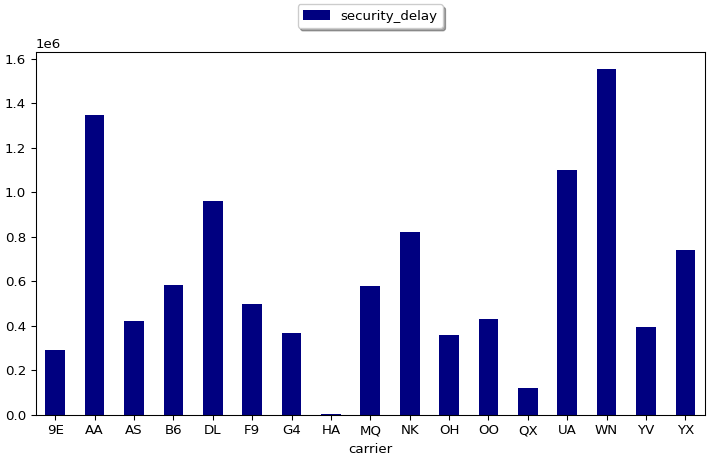

In [ ]:
#Which carrier has more delay due to security
display(airline_data)



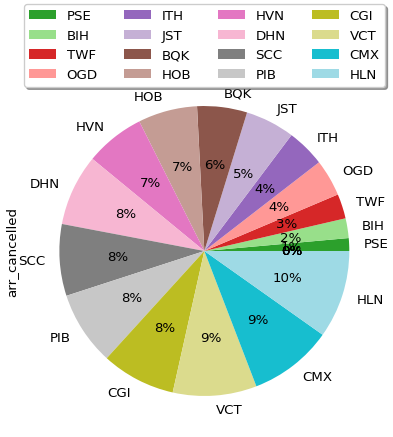

In [39]:
#Which Airport has most cancelled flights
display(airline_data) 



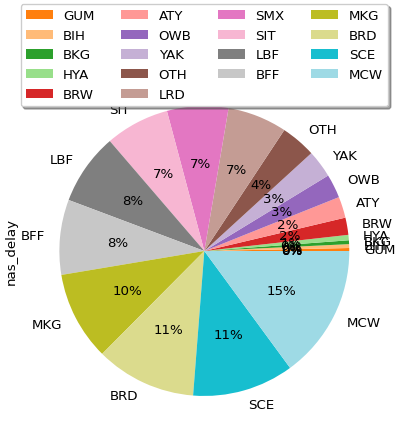

In [40]:
#Which airport has more delay due to NAS
display(airline_data)



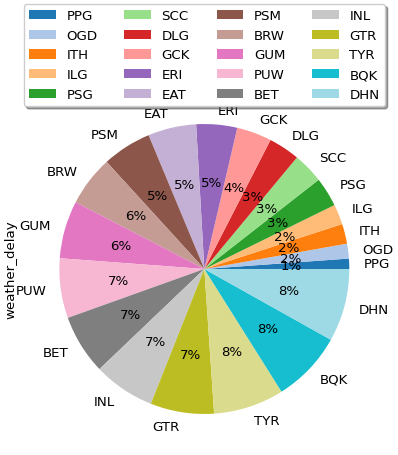

In [41]:
#Which airport has more weather delay
display(airline_data)



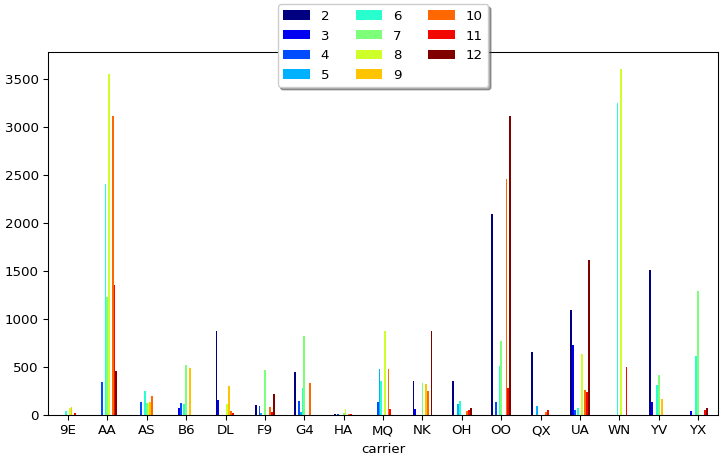

In [42]:
#Which carrier has more diverted flights in each month
display(airline_data)



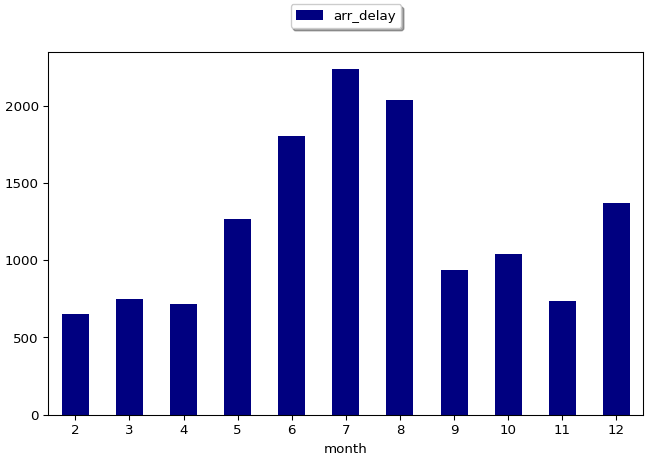

In [45]:
#Overall delay of flights with respect to months
display(airline_data)